In [144]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder

In [145]:
df = pd.read_csv("mcdonalds.csv")
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [146]:
df.shape

(1453, 15)

In [147]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Taking the first 11 columns as they have yes no and convert them into binary

In [148]:
df_bin = df.iloc[:, 0:11].copy()
df_bin = (df_bin == "Yes").astype(int)
print(df_bin)
c_means = df_bin.mean(axis=0).round(2)
c_means

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [149]:
pca = PCA()
pca.fit(df_bin)
ex_var_ratio = pca.explained_variance_ratio_
stds = np.round(np.sqrt(pca.explained_variance_),1)
print('Standard Deviations:', stds)
print('Proportion of Variance: ', ex_var_ratio)
print('cumulative proportion',np.cumsum(ex_var_ratio))



Standard Deviations: [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Proportion of Variance:  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
cumulative proportion [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [150]:
relationship_matrix = pd.DataFrame(np.round(pca.components_.T,3), columns=[f"PC{i+1}" for i in range(pca.n_components_)], index=df_bin.columns)
relationship_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


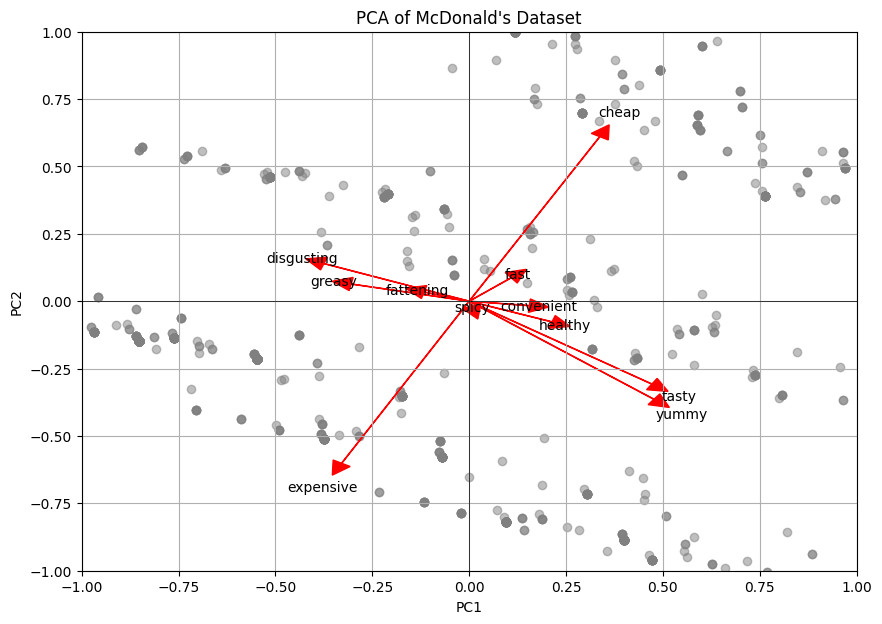

In [151]:
pca_1 = PCA(n_components=2)
projected_data = pca_1.fit_transform(df_bin)

plt.figure(figsize=(10, 7))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey', alpha=0.5)

# Plot the PCA components using arrows
for i, (comp1, comp2) in enumerate(zip(pca_1.components_[0], pca_1.components_[1])):
    plt.arrow(0, 0, -comp1, -comp2, color='r', alpha=1, head_width=0.05, head_length=0.05)
    plt.text(-comp1*1.15, -comp2*1.15, df_bin.columns[i], color='black', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonald\'s Dataset')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-1, 1)
plt.ylim(-1,1)
plt.show()




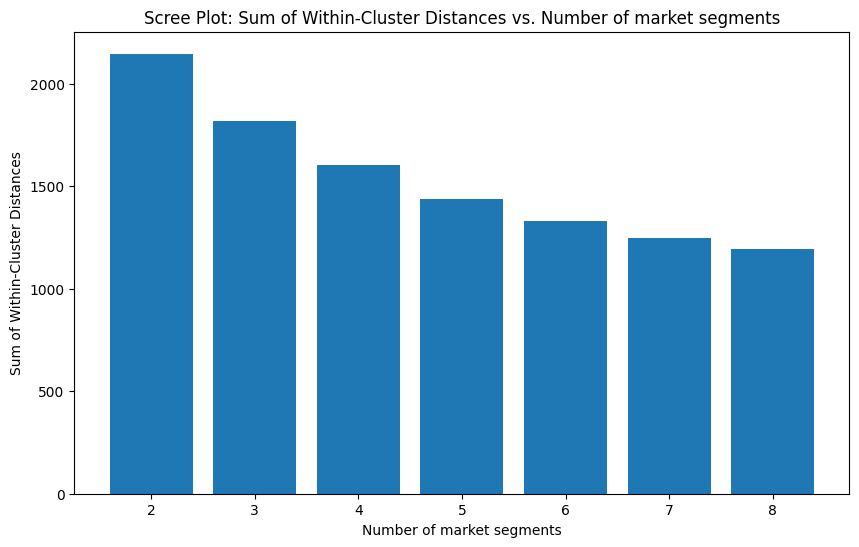

In [152]:
# Range of clusters
clusters = range(2, 9) 

# Storing the sum of squared distances
sum_of_squared_distances = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=1234,n_init=10,verbose=False)
    kmeans.fit(df_bin)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.bar(clusters, sum_of_squared_distances)
plt.title('Scree Plot: Sum of Within-Cluster Distances vs. Number of market segments')
plt.xlabel('Number of market segments')
plt.ylabel('Sum of Within-Cluster Distances')
plt.show()



It doesnt give us a better analysis on how many clusters to choose

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

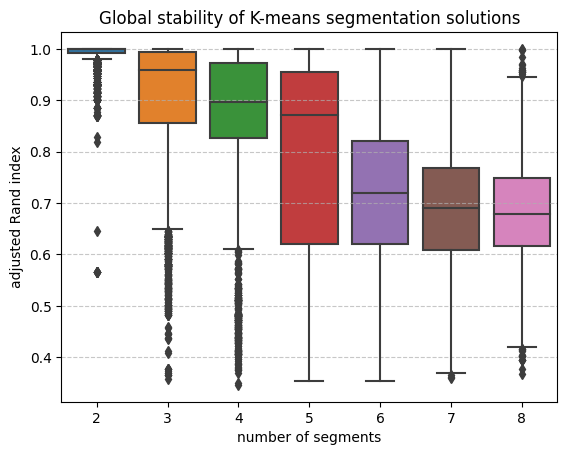

In [153]:
# Number of clusters to test
k_values = list(range(2, 9))

# Number of bootstrap samples and repetitions
nboot = 100
nrep = 10

# Store adjusted Rand indices
aris = {k: [] for k in k_values}

np.random.seed(1234)

for k in k_values:
    for _ in range(nboot):
        # Resample data for bootstrapping
        bootstrap_sample = resample(df_bin, replace=True)
        
        # Store cluster assignments from multiple initializations
        clusterings = []
        
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=k, init='k-means++')
            cluster_assignments = kmeans.fit_predict(bootstrap_sample)
            clusterings.append(cluster_assignments)
        
        # Calculate ARI between pairs of cluster assignments
        for i in range(nrep):
            for j in range(i+1, nrep):
                ari = adjusted_rand_score(clusterings[i], clusterings[j])
                aris[k].append(ari)

# Plotting
sns.boxplot(data=[aris[k] for k in k_values])
plt.xticks(ticks=range(len(k_values)), labels=k_values)
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.title("Global stability of K-means segmentation solutions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

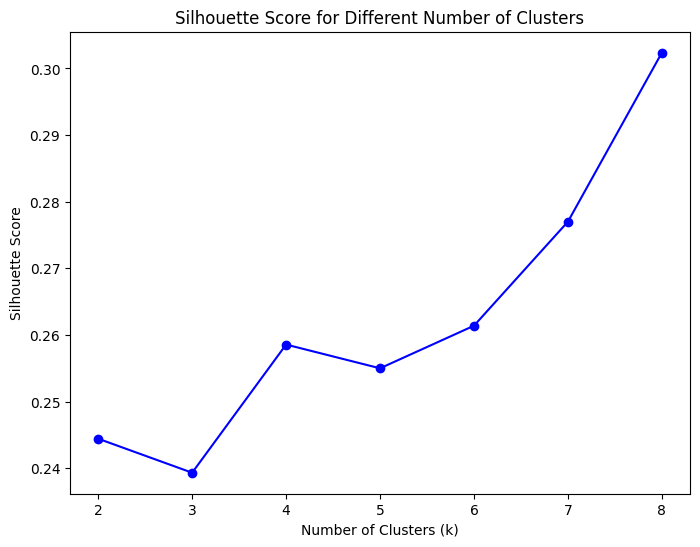

In [154]:
# Define the range of clusters to check
k_values = range(2, 9) 

# Initialize empty list to store average silhouette scores
silhouette_scores = []

# Loop through possible k values and compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_bin)
    silhouette_avg = silhouette_score(df_bin, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


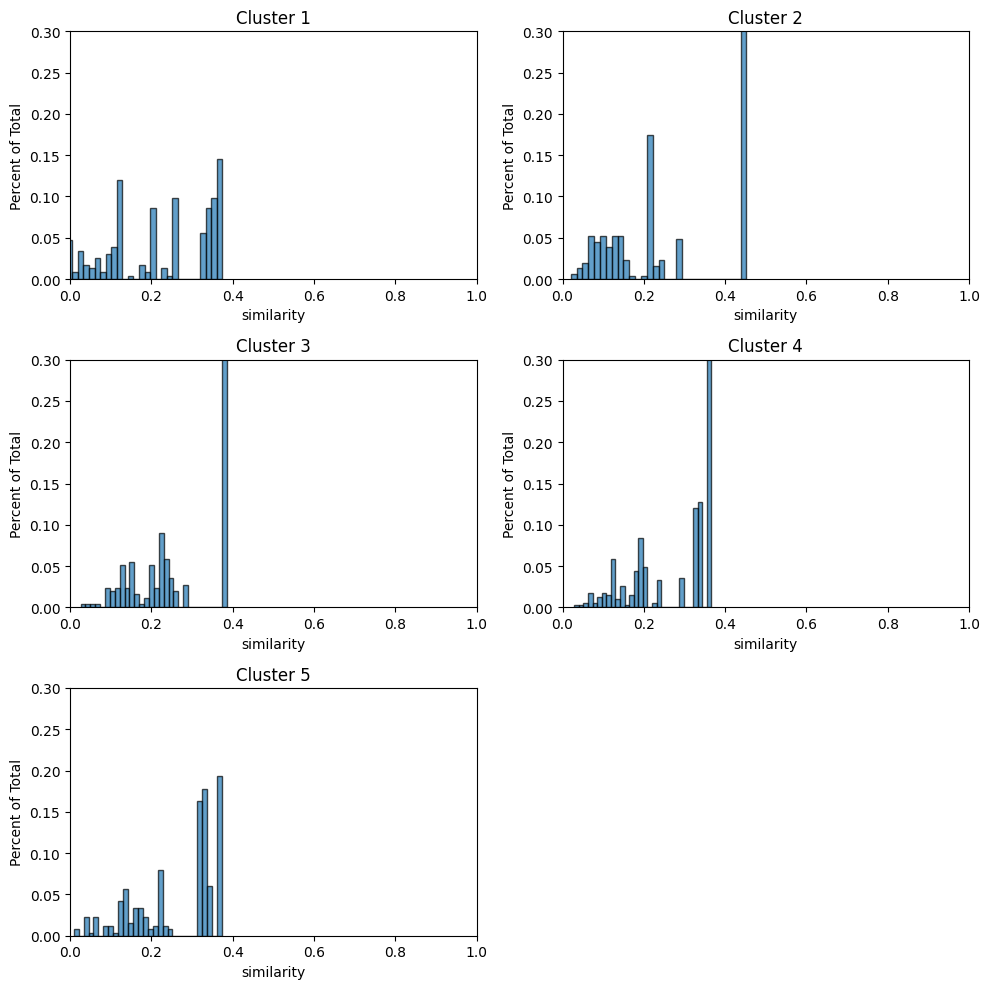

In [155]:
# Refit the KMeans model with 5 clusters on the entire dataset
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df_bin)

# Get the assigned labels for each data point
labels = kmeans.labels_

# Compute silhouette scores for each sample
silhouette_scores = silhouette_samples(df_bin, labels)

# Plot histogram of silhouette scores for each cluster
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(3, 2, i + 1)
    
    # Fetch silhouette scores for the specific cluster
    cluster_silhouette_scores = silhouette_scores[labels == i]
    
    # Convert the silhouette scores to percent of total for the y-axis
    weights = np.ones_like(cluster_silhouette_scores) / float(len(cluster_silhouette_scores))
    
    plt.hist(cluster_silhouette_scores, bins=30, weights=weights, edgecolor="k", alpha=0.7)
    plt.title(f"Cluster {i + 1}")
    plt.xlabel("similarity")
    plt.ylabel("Percent of Total")
    plt.xlim([0, 1])
    plt.ylim([0, 0.3])
plt.tight_layout()
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

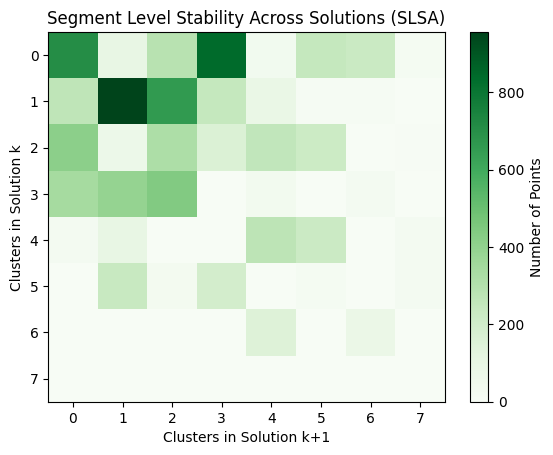

In [156]:
# Cluster data for solutions from 2 to 8 segments
cluster_assignments = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k)
    cluster_assignments[k] = kmeans.fit_predict(df_bin)

# Create transition matrix
max_clusters = 8
transition_matrix = np.zeros((max_clusters, max_clusters))

for k in range(2, 8):
    for i in range(len(df_bin)):
        if cluster_assignments[k+1][i] < max_clusters:
            transition_matrix[cluster_assignments[k][i], cluster_assignments[k+1][i]] += 1

# Plotting the SLSA
plt.imshow(transition_matrix, cmap="Greens", aspect="auto")
plt.colorbar(label="Number of Points")
plt.xlabel("Clusters in Solution k+1")
plt.ylabel("Clusters in Solution k")
plt.title("Segment Level Stability Across Solutions (SLSA)")
plt.xticks(range(max_clusters))
plt.yticks(range(max_clusters))
plt.grid(False)
plt.show()


Given the purpose for the mcd dataset and the aim of the exploration, the 5-cluster solution shows increased granularity and stability it offers can provide McDonald's with nuanced insights into brand perceptions, allowing for more targeted communication and intervention strategies. 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

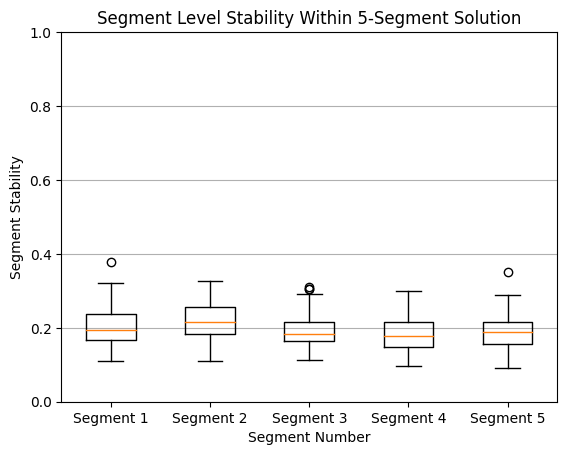

In [157]:
# 1. Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_bin)
df_bin_5_labels = kmeans.labels_

def segment_stability(data, cluster_labels, n_clusters=5, n_bootstraps=100):
    all_stabilities = {i: [] for i in range(n_clusters)}
    
    for cluster_num in range(n_clusters):
        
        cluster_indices = np.where(cluster_labels == cluster_num)[0]
        
        # Bootstrap and re-cluster
        for _ in range(n_bootstraps):
            # Resample the data
            resampled_data = resample(data)
            
            # Re-cluster the resampled data
            kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(resampled_data)
            
            # Check how many of the original cluster members remain in the same cluster
            resampled_cluster_indices = np.where(kmeans.labels_ == cluster_num)[0]
            common_indices = len(np.intersect1d(cluster_indices, resampled_cluster_indices))
            all_stabilities[cluster_num].append(common_indices / len(cluster_indices))
    
    return all_stabilities

# 2. Calculate the segment-level stability
df_bin_5_stabilities = segment_stability(df_bin, df_bin_5_labels)

# 3. Visualize the stability using a box plot
plt.boxplot([df_bin_5_stabilities[i] for i in range(5)])
plt.xticks(range(1, 6), [f"Segment {i+1}" for i in range(5)])
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Within 5-Segment Solution")
plt.grid(axis='y')
plt.show()


All segments have a moderate level of stability with medians around 0.4 to 0.5.
Segments 1 and 5 appear to have slightly more consistent stability values given their tighter IQRs, while Segments 2, 3, and 4 have broader IQRs, indicating more variability in their stabilities across different bootstrap samples.
Segments 2, 4, and 5 have outliers on the higher side, suggesting that there were some bootstrap replications where a notably larger percentage of data points remained in their original clusters than usual.

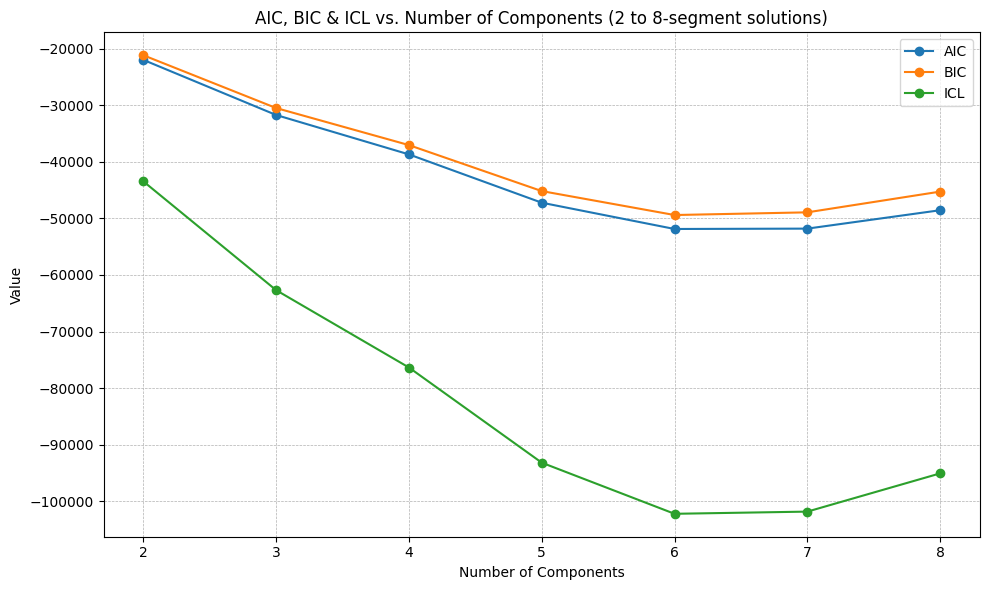

In [158]:
# Set random seed for reproducibility
np.random.seed(1234)

# Initialize arrays to store AIC, BIC, and ICL values
num_components = list(range(2, 9))
aic_values = []
bic_values = []
icl_values = []

for k in num_components:
    gmm = GaussianMixture(n_components=k, n_init=10).fit(df_bin)
    
    aic_values.append(gmm.aic(df_bin))
    bic_values.append(gmm.bic(df_bin))
    
    # Compute ICL
    log_likelihood = np.sum(gmm.predict_proba(df_bin) * gmm.score_samples(df_bin)[:, np.newaxis])
    icl = bic_values[-1] - 2 * log_likelihood
    icl_values.append(icl)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(num_components, aic_values, marker='o', linestyle='-', label='AIC')
plt.plot(num_components, bic_values, marker='o', linestyle='-', label='BIC')
plt.plot(num_components, icl_values, marker='o', linestyle='-', label='ICL')

plt.xlabel('Number of Components')
plt.ylabel('Value')
plt.title('AIC, BIC & ICL vs. Number of Components (2 to 8-segment solutions)')
plt.legend()

plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Elbow Point

Both AIC and BIC display a noticeable change in their decline around the point representing 4 components.
This 'elbow' in the graph can be an indicator for the optimal number of components in statistical models, suggesting minimal improvement in model fit beyond 4 components for AIC and BIC.
ICL Trend

The ICL graph showcases a pronounced elbow at 4 components, after which its value increases.
This rise in the ICL value can indicate potential over-segmentation or overfitting when components exceed 4.
Criteria Comparison

The ICL has the steepest decline when moving from 2 to 4 components.
While AIC and BIC suggest models with 4 or more components might be suitable, ICL strongly indicates that 4 components would be optimal.
General Trend

All three criteria converge on the assessment that a 2-component solution might not be the best fit.
As the number of components increases, AIC, BIC, and ICL values decrease, suggesting a better model fit. Beyond 4 components, the improvements seem to plateau or even reverse.
Considerations for Higher Components

For component values between 5 to 8, the criteria values remain relatively constant.
This suggests that increasing components in this range may not provide a substantial boost in the model's explanatory power relative to the added computational cost and complexity.

So using mixture distributions shows 4 to be a optimal solution for the data while kmeans clustering shows a 5 to be the optimal solution

In [159]:
# 4-segment k-means solution
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(df_bin)
clusters_kmeans_4 = kmeans_4.labels_

# 4-segment mixture model
mixture_4 = GaussianMixture(n_components=4, random_state=0).fit(df_bin)

# 4-segment mixture model initialized with k-means centroids
mixture_4a = GaussianMixture(n_components=4, random_state=0, means_init=kmeans_4.cluster_centers_).fit(df_bin)
clusters_mixture_4a = mixture_4a.predict(df_bin)

# Cross tabulation for 4-segment solution with initialization
table_4a = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        table_4a[i, j] = np.sum((clusters_kmeans_4 == i) & (clusters_mixture_4a == j))

print("Cross-tabulation for 4-segment solution with initialization:")
print(table_4a)
clusters_mixture_4 = mixture_4.predict(df_bin)

# Cross tabulation for 4-segment solution
table_4 = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        table_4[i, j] = np.sum((clusters_kmeans_4 == i) & (clusters_mixture_4 == j))

print("Cross-tabulation for 4-segment solution:")
print(table_4)

# 5-segment k-means solution
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(df_bin)
clusters_kmeans_5 = kmeans_5.labels_

# 5-segment mixture model
mixture_5 = GaussianMixture(n_components=5, random_state=0).fit(df_bin)
clusters_mixture_5 = mixture_5.predict(df_bin)
# 5-segment mixture model initialized with k-means centroids
mixture_5a = GaussianMixture(n_components=5, random_state=0, means_init=kmeans_5.cluster_centers_).fit(df_bin)
clusters_mixture_5a = mixture_5a.predict(df_bin)

# Cross tabulation for 5-segment solution with initialization
table_5a = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        table_5a[i, j] = np.sum((clusters_kmeans_5 == i) & (clusters_mixture_5a == j))

print("\nCross-tabulation for 5-segment solution with initialization:")
print(table_5a)


# Cross tabulation for 5-segment solution
table_5 = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        table_5[i, j] = np.sum((clusters_kmeans_5 == i) & (clusters_mixture_5 == j))

print("\nCross-tabulation for 5-segment solution:")
print(table_5)


Cross-tabulation for 4-segment solution with initialization:
[[  0. 309.   0.   0.]
 [  0. 580.   0.   0.]
 [  0. 324.   0.   0.]
 [  4. 236.   0.   0.]]
Cross-tabulation for 4-segment solution:
[[261.   0.  48.   0.]
 [ 14.   0.  65. 501.]
 [  7. 224.  45.  48.]
 [ 36. 185.  19.   0.]]

Cross-tabulation for 5-segment solution with initialization:
[[ 98.   7.   4. 118.   0.]
 [ 26. 225.   0.  42.   0.]
 [ 37. 296.   0.  58.   0.]
 [  5.  37.   0. 246.   0.]
 [228.   0.   0.  26.   0.]]

Cross-tabulation for 5-segment solution:
[[ 23. 187.   3.   0.  14.]
 [  9.   0.  90. 180.  14.]
 [  9.   0.  76. 295.  11.]
 [ 12.   0.  19.   0. 257.]
 [ 29. 225.   0.   0.   0.]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now compare these with the kmeans initialized guassian mixture

In [160]:
# Experimental values for eps and min_samples for initial exploration
eps_values = [0.05, 0.1, 0.15, 0.2]
min_samples_values = [3, 4, 5, 6]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(metric='hamming', eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_bin)
        
        # Count of clusters and noise points
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        
        results.append((eps, min_samples, n_clusters, n_noise))

# Display the results
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'n_noise'])
print(results_df)


     eps  min_samples  n_clusters  n_noise
0   0.05            3          93      213
1   0.05            4          75      267
2   0.05            5          57      339
3   0.05            6          44      404
4   0.10            3           1       10
5   0.10            4           1       10
6   0.10            5           1       10
7   0.10            6           1       14
8   0.15            3           1       10
9   0.15            4           1       10
10  0.15            5           1       10
11  0.15            6           1       14
12  0.20            3           1        0
13  0.20            4           1        0
14  0.20            5           1        0
15  0.20            6           1        0


Choosing the best values for DBSCAN

In [161]:
eps_value = 0.20
min_samples_value = 3

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric='hamming')
clusters = dbscan.fit_predict(df_bin)

# Find unique clusters and their counts
unique, counts = np.unique(clusters, return_counts=True)
n_clusters = len(unique) - (1 if -1 in unique else 0)  # -1 represents noise in DBSCAN

print(f"Number of clusters: {n_clusters}")


Number of clusters: 1


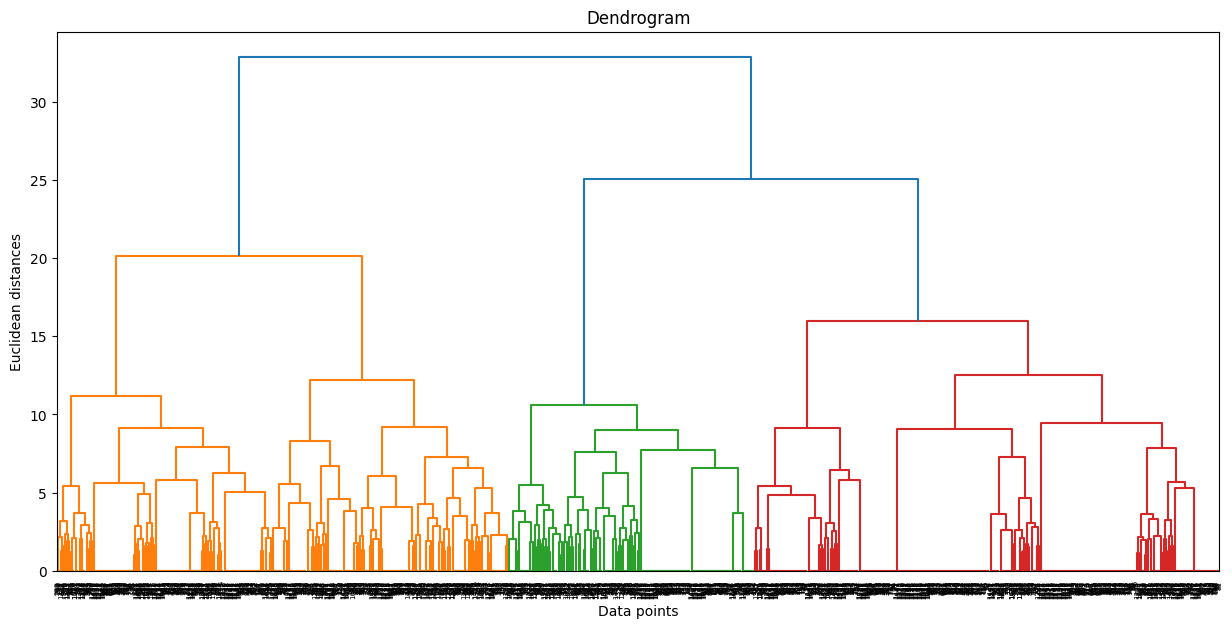

In [162]:
# Compute the linkage matrix
linkage_matrix = linkage(df_bin, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()


In [163]:
best_clusters = 2  # at least 2 clusters
best_score = -1  # silhouette scores range from -1 to 1

# Evaluate the silhouette score for clusters from 2 to 8 for agClustering
for n_clusters in range(2, 9):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    preds = agglomerative.fit_predict(df_bin)
    
    score = silhouette_score(df_bin, preds)
    print(f"For {n_clusters} clusters, silhouette score is {score}")
    
    if score > best_score:
        best_clusters = n_clusters
        best_score = score

print(f"\nThe best number of clusters based on silhouette score is: {best_clusters}")


For 2 clusters, silhouette score is 0.21659533096625103
For 3 clusters, silhouette score is 0.20909318936169
For 4 clusters, silhouette score is 0.2266930182702948
For 5 clusters, silhouette score is 0.20986797260773984
For 6 clusters, silhouette score is 0.21743636928120955
For 7 clusters, silhouette score is 0.21766661736616028
For 8 clusters, silhouette score is 0.22895853853910236

The best number of clusters based on silhouette score is: 8


In [164]:
# Define function for creating cross-tabulation tables
def create_crosstab(n, labels1, labels2):
    table = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            table[i, j] = np.sum((labels1 == i) & (labels2 == j))
    return table

# Function to compute centroids of clusters
def compute_centroids(data, labels, n_clusters):
    centroids = []
    for i in range(n_clusters):
        centroids.append(data[labels == i].mean(axis=0))
    return np.array(centroids)

# 4-segment Agglomerative Hierarchical Clustering
ahc_4 = AgglomerativeClustering(n_clusters=4).fit(df_bin)
clusters_ahc_4 = ahc_4.labels_
centroids_4 = compute_centroids(df_bin, clusters_ahc_4, 4)

# 4-segment Gaussian Mixture Model
gmm_4 = GaussianMixture(n_components=4, random_state=0).fit(df_bin)
clusters_gmm_4 = gmm_4.predict(df_bin)

# 4-segment Gaussian Mixture Model initialized with AHC centroids
gmm_4_initialized = GaussianMixture(n_components=4, random_state=0, means_init=centroids_4).fit(df_bin)
clusters_gmm_4_initialized = gmm_4_initialized.predict(df_bin)

print("Cross-tabulation for 4-segment solution without initialization (AHC vs. GMM):")
print(create_crosstab(4, clusters_ahc_4, clusters_gmm_4))
print("\nCross-tabulation for 4-segment solution with initialization (AHC vs. Initialized GMM):")
print(create_crosstab(4, clusters_ahc_4, clusters_gmm_4_initialized))

# 5-segment Agglomerative Hierarchical Clustering
ahc_5 = AgglomerativeClustering(n_clusters=5).fit(df_bin)
clusters_ahc_5 = ahc_5.labels_
centroids_5 = compute_centroids(df_bin, clusters_ahc_5, 5)

# 5-segment Gaussian Mixture Model
gmm_5 = GaussianMixture(n_components=5, random_state=0).fit(df_bin)
clusters_gmm_5 = gmm_5.predict(df_bin)

# 5-segment Gaussian Mixture Model initialized with AHC centroids
gmm_5_initialized = GaussianMixture(n_components=5, random_state=0, means_init=centroids_5).fit(df_bin)
clusters_gmm_5_initialized = gmm_5_initialized.predict(df_bin)

print("\nCross-tabulation for 5-segment solution without initialization (AHC vs. GMM):")
print(create_crosstab(5, clusters_ahc_5, clusters_gmm_5))
print("\nCross-tabulation for 5-segment solution with initialization (AHC vs. Initialized GMM):")
print(create_crosstab(5, clusters_ahc_5, clusters_gmm_5_initialized))



Cross-tabulation for 4-segment solution without initialization (AHC vs. GMM):
[[  6.   0.  86. 489.]
 [ 78. 197.  18.   2.]
 [  0. 211.  48.  49.]
 [234.   1.  25.   9.]]

Cross-tabulation for 4-segment solution with initialization (AHC vs. Initialized GMM):
[[445. 136.   0.   0.]
 [  0. 291.   4.   0.]
 [  0. 308.   0.   0.]
 [ 15. 254.   0.   0.]]

Cross-tabulation for 5-segment solution without initialization (AHC vs. GMM):
[[  0.   0. 141. 260.   3.]
 [ 26. 197.   5.   0.  67.]
 [ 38. 215.  16.  39.   0.]
 [ 18.   0.  24.   4. 223.]
 [  0.   0.   2. 172.   3.]]

Cross-tabulation for 5-segment solution with initialization (AHC vs. Initialized GMM):
[[401.   3.   0.   0.   0.]
 [ 28. 135.   4. 128.   0.]
 [ 10. 296.   0.   2.   0.]
 [ 52.  17.   0. 200.   0.]
 [177.   0.   0.   0.   0.]]


From this we find 4 to be more consitent and stable while 5 can be used to make more interpretations as there is more granularity.

In [165]:
# Gaussian Mixture Model with and without initialization
log_likelihood_4 = gmm_4.score(df_bin) * len(df_bin)
print(f"log Likelihood without initialization: {log_likelihood_4}")
log_likelihood_4a = gmm_4_initialized.score(df_bin) * len(df_bin)
print(f"log Likelihood with initialization: {log_likelihood_4a}")



log Likelihood without initialization: 10357.069474366066
log Likelihood with initialization: 10345.982986651694


 for the 4-cluster solution, the Gaussian Mixture Model without initialization seems to be a better model in terms of fit to the data.

Now using regression of mixtures

In [166]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [167]:
df_bin['Like']=df['Like']
df_bin['Like'] = df_bin['Like'].str.extract(r'([-+]?\d+)')[0].astype(int)
df_bin['Like.n'] = 6 - df_bin['Like']
df_bin



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,-3,9
1,1,1,0,1,1,1,1,1,1,0,0,2,4
2,0,1,1,1,1,1,0,1,1,1,0,1,5
3,1,1,0,1,1,1,1,1,0,0,1,4,2
4,0,1,0,1,1,1,1,0,0,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,11
1449,1,1,0,1,0,0,1,1,0,1,0,2,4
1450,1,1,0,1,0,1,0,1,1,0,0,3,3
1451,1,1,0,0,0,1,1,1,0,1,0,4,2


In [168]:
X = df_bin.drop(columns=['Like','Like.n']) 
y = df_bin['Like.n']


In [169]:
gm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=False)
gm.fit(X, y)


GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=False)

Cluster 1: 985
Cluster 2: 468
Converged after 7 iterations
Comp1                             OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     80.90
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          1.94e-102
Time:                        14:14:24   Log-Likelihood:                -1987.2
No. Observations:                 985   AIC:                             3992.
Df Residuals:                     976   BIC:                             4036.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


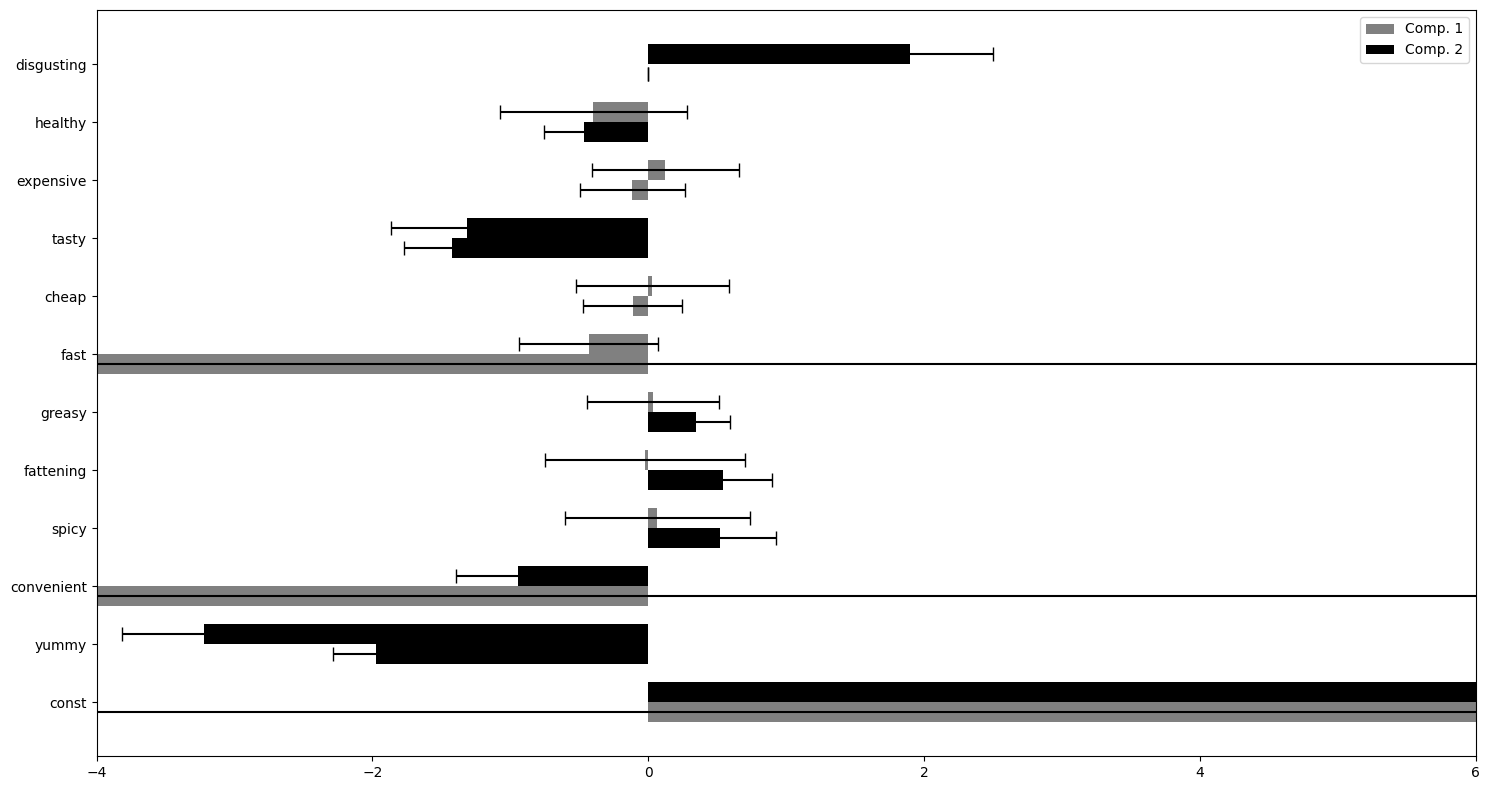

In [170]:
# Predict clusters
labels = gm.predict(X)

# Count number of data points in each cluster
(unique, counts) = np.unique(labels, return_counts=True)
clusters_info = dict(zip(unique, counts))

# Print cluster sizes
for cluster, size in clusters_info.items():
    print(f"Cluster {cluster + 1}: {size}")

# Print convergence info
print(f"Converged after {gm.n_iter_} iterations")


# Fit a linear regression model to each cluster
regressions = {}
for label in np.unique(labels):
    mask = labels == label
    X = sm.add_constant(X)
    lr = sm.OLS(y[mask], X[mask]).fit()
    regressions[label] = lr
summary1 = regressions[0].summary()
print('Comp1',regressions[0].summary())
summary2 = regressions[1].summary()
print('Comp2',regressions[1].summary())


# Convert summaries to dataframes
def summary_to_df(summary):
    table = summary.tables[1]
    return pd.DataFrame(table.data[1:], columns=table.data[0])

df_comp1 = summary_to_df(summary1)
df_comp2 = summary_to_df(summary2)


# Coefficients, standard errors, and labels from dataframes
coef_comp1 = df_comp1['coef'].values.astype(float)
std_err_comp1 = df_comp1['std err'].values.astype(float)
coef_comp2 = df_comp2['coef'].values.astype(float)
std_err_comp2 = df_comp2['std err'].values.astype(float)
labels = df_comp1[''].values
p_values_comp1 = df_comp1['P>|t|'].values.astype(float)
p_values_comp2 = df_comp2['P>|t|'].values.astype(float)

# Calculate 95% confidence intervals
ci_comp1 = 1.96 * np.array(std_err_comp1)
ci_comp2 = 1.96 * np.array(std_err_comp2)

# Colors based on significance
colors_comp1 = ['grey' if p > 0.05 or np.isnan(p) else 'black' for p in p_values_comp1]
colors_comp2 = ['grey' if p > 0.05 else 'black' for p in p_values_comp2]

# Plot
y = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))

# Comp. 1 bars
ax.barh(y - width/2, coef_comp1, width, xerr=ci_comp1, color=colors_comp1, label='Comp. 1', capsize=5)
ax.set_xlim([-4, 6])

# Comp. 2 bars
ax.barh(y + width/2, coef_comp2, width, xerr=ci_comp2, color=colors_comp2, label='Comp. 2', capsize=5)
ax.set_xlim([-4, 6])

# Labels and legends
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(loc='upper right')

fig.tight_layout()
plt.show()







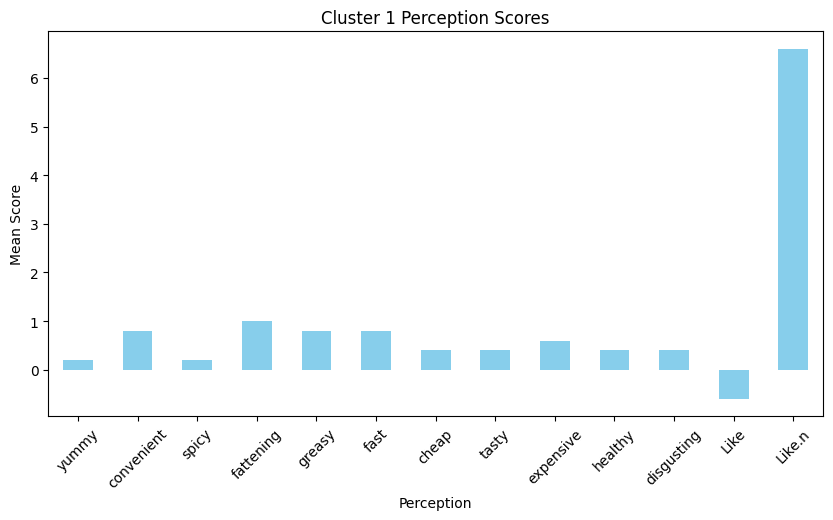

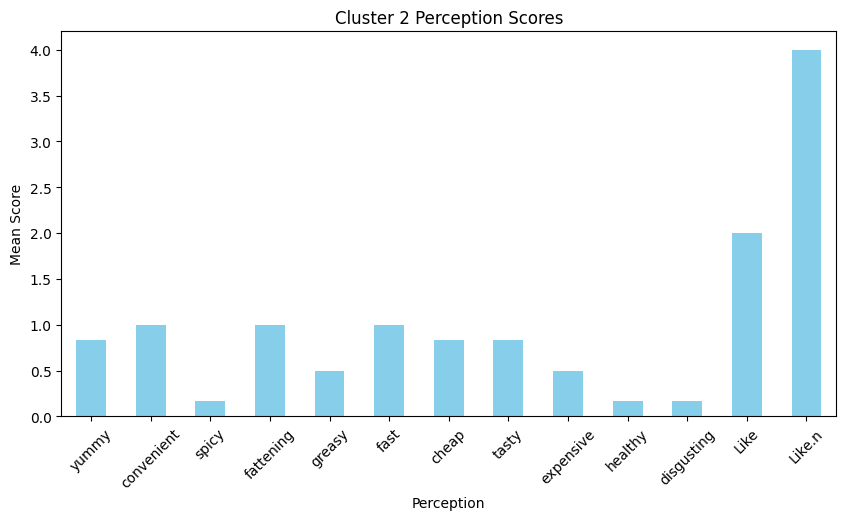

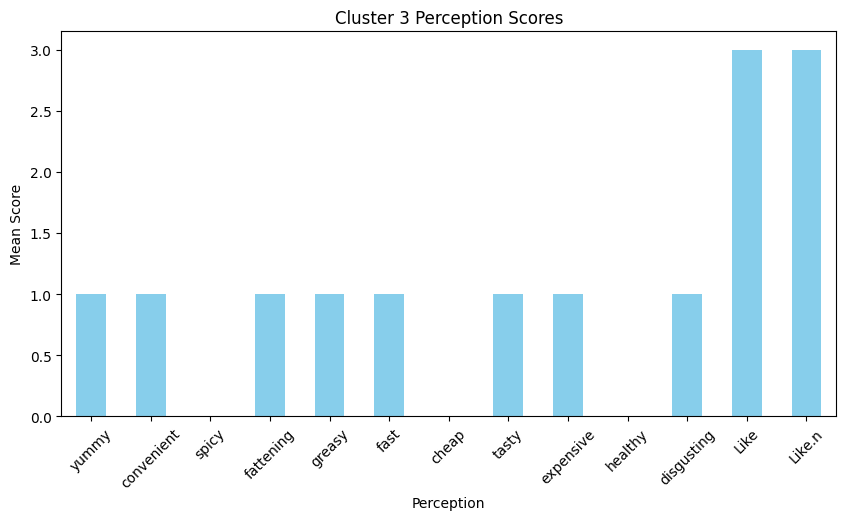

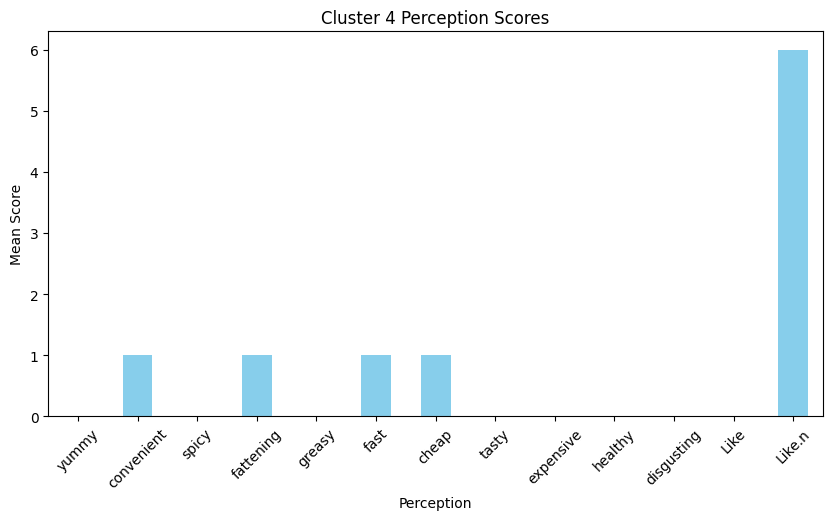

In [171]:
# Step 1: Calculate the distance matrix
distance_matrix = sch.distance.pdist(df_bin.T)

# Step 2: Perform hierarchical clustering
hierarchical_clustering = sch.linkage(distance_matrix, method='ward')

# Step 3: Add cluster labels to the DataFrame
num_clusters = 4
cluster_labels = sch.fcluster(hierarchical_clustering, t=num_clusters, criterion='maxclust')

# Create a new DataFrame with the cluster labels
cluster_df = pd.DataFrame({'Cluster': cluster_labels})

# Concatenate the cluster labels with the original df_bin DataFrame
df_bin_with_clusters = pd.concat([df_bin, cluster_df], axis=1)

# Step 4: Calculate the mean values for each perception within each cluster
cluster_percents = df_bin_with_clusters.groupby('Cluster').mean()

# Step 5: Plot bar plots for each cluster
for cluster_num in range(1, num_clusters + 1):
    plt.figure(figsize=(10, 5))
    cluster_data = cluster_percents.loc[cluster_num]
    cluster_data.plot(kind='bar', color='skyblue')
    plt.title(f'Cluster {cluster_num} Perception Scores')
    plt.xlabel('Perception')
    plt.ylabel('Mean Score')
    plt.xticks(rotation=45)
    plt.show()


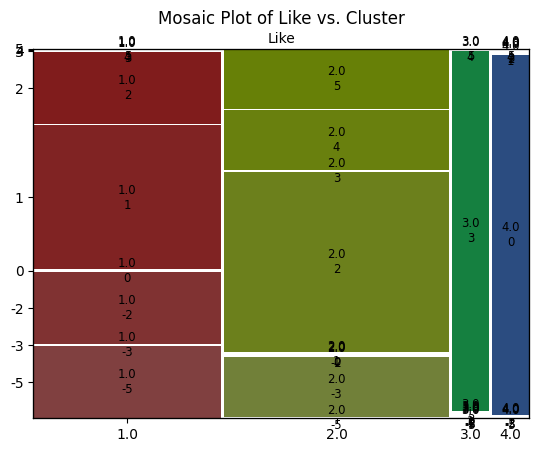

In [172]:
# Create a frequency table
frequency_table = pd.crosstab(df_bin_with_clusters['Like'], df_bin_with_clusters['Cluster'])
frequency_table = frequency_table.T

# Plot the mosaic plot
mosaic(frequency_table.stack(), title="Mosaic Plot of Like vs. Cluster")
plt.xlabel('Like')
plt.ylabel('Cluster')
plt.show()


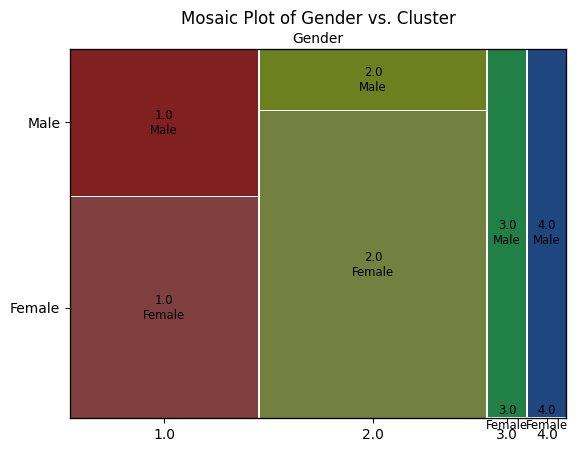

In [173]:
# Create a frequency table
frequency_table = pd.crosstab(df['Gender'], df_bin_with_clusters['Cluster'])
frequency_table = frequency_table.T

# Plot the mosaic plot
mosaic(frequency_table.stack(), title="Mosaic Plot of Gender vs. Cluster")
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.show()


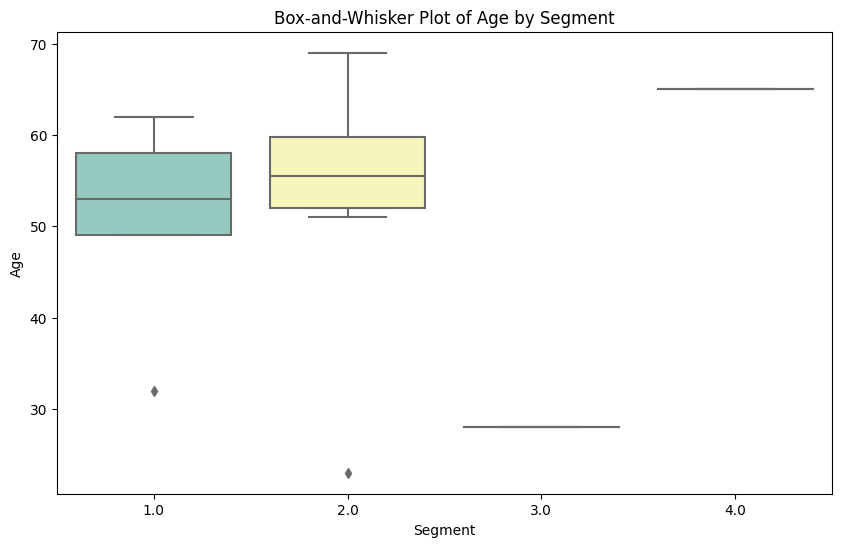

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_bin_with_clusters['Cluster'], y=df['Age'], palette='Set3')
plt.title('Box-and-Whisker Plot of Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()


In [175]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=1234,n_init=10,init='k-means++')
kmeans.fit(df_bin)
cluster_labels = kmeans.labels_
df_bin['Clusterkm'] = cluster_labels
df_with_clusters_km = df.copy()




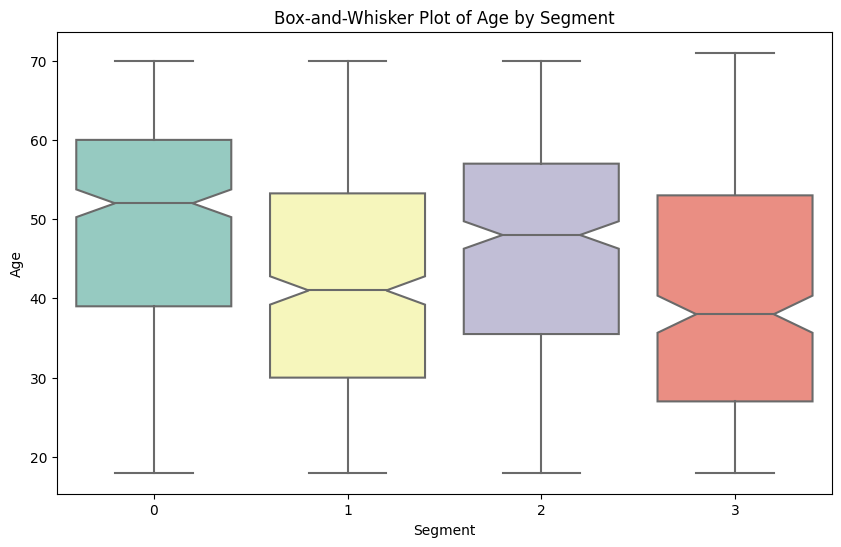

In [176]:
# Create the box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_bin['Clusterkm'], y=df['Age'], palette='Set3',notch=True)
plt.title('Box-and-Whisker Plot of Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()


In [177]:
df_bin['VisitFrequency']=df['VisitFrequency']
df_bin['Gender']=df['Gender']
label_encoder = LabelEncoder()

df_bin['VisitFrequency_encode'] = label_encoder.fit_transform(df['VisitFrequency'])

df_bin['Gender'] = df_bin['Gender'].map({'Female': 1, 'Male': 0})


features = df_bin[['Like.n', 'VisitFrequency_encode', 'Gender']]

# Perform k-means clustering with 4 clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=1234,n_init=10,init='k-means++')
kmeans.fit_predict(features)

cluster_labels = kmeans.labels_
df_bin['Clusterkm_all'] = cluster_labels

visit_means_by_cluster = df_bin.groupby('Clusterkm_all')['VisitFrequency_encode'].mean()
like_means_by_cluster = df_bin.groupby('Clusterkm_all')['Like.n'].mean()
female_means_by_cluster = df_bin.groupby('Clusterkm_all')['Gender'].mean()




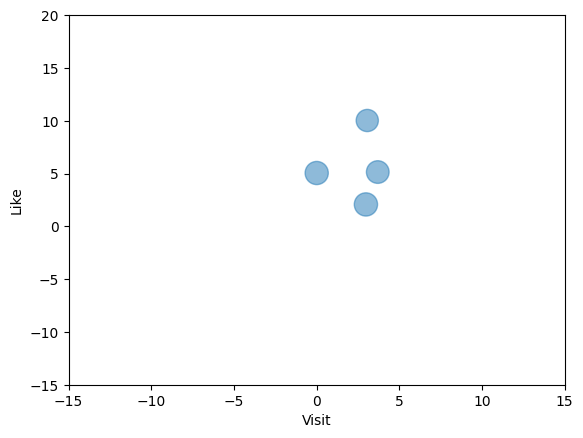

In [178]:
plt.scatter(visit_means_by_cluster, like_means_by_cluster, s=500*female_means_by_cluster, alpha=0.5)

# Set the plot limits
plt.xlim(-15, 15)
plt.ylim(-15, 20)

plt.xlabel('Visit')
plt.ylabel('Like')


plt.show()